In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
inputExcelFile ="Statistics.xlsx"

excelFile = pd.read_excel (inputExcelFile)

excelFile.to_csv ("convertedstats.csv", index = None, header=True)

In [5]:

df = pd.DataFrame(pd.read_csv("convertedstats.csv"))

In [6]:
df.head()

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
0,383422,2014-05-01 11:40:49,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:32,Hired,Female,Service Department,c5,22075.0
2,176719,2014-05-06 08:08:54,Rejected,Male,Service Department,c5,70069.0
3,429799,2014-05-02 16:28:59,Rejected,Female,Operations Department,i4,3207.0
4,253651,2014-05-02 16:32:26,Hired,Male,Operations Department,i4,29668.0


In [8]:
df.shape

(7168, 7)

In [13]:
s = df['Status'].describe()
print(s['count'])

7168


In [ ]:
# Question 1

In [15]:
onlyHired = df[df['Status'] != 'Rejected']
onlyHired.head()

,application_id,Interview Taken on,Status,event_name,Department,Post Name,Offered Salary
0,383422,2014-05-01 11:40:49,Hired,Male,Service Department,c8,56553.0
1,907518,2014-05-06 08:08:32,Hired,Female,Service Department,c5,22075.0
4,253651,2014-05-02 16:32:26,Hired,Male,Operations Department,i4,29668.0
5,289907,2014-05-01 07:44:18,Hired,Male,Sales Department,-,85914.0
8,751029,2014-05-02 13:09:57,Hired,Female,Service Department,i4,15156.0


In [20]:
Males = onlyHired[onlyHired['event_name'] == 'Male']
Males = Males['event_name'].describe()
print(Males['count'])

2563


In [21]:
Females = onlyHired[onlyHired['event_name'] == 'Female']
Females = Females['event_name'].describe()
print(Females['count'])

1856


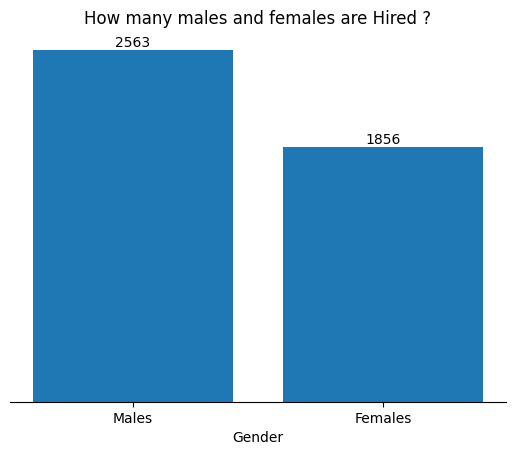

In [33]:
male_count = Males['count']
female_count = Females['count']

labels = ['Males', 'Females']
counts = [male_count, female_count]

plt.bar(labels, counts)
plt.xlabel('Gender')
plt.title('How many males and females are Hired ?')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(left=False, labelleft=False)
for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
plt.show()


In [ ]:
# Question 2

In [42]:
Average_sal = df['Offered Salary'].sum()/df['Offered Salary'].count()
print("What is the average salary offered in this company ?")
print(f"The Average Salary offered in this company is {Average_sal.round()}")

What is the average salary offered in this company ?
The Average Salary offered in this company is 49983.0


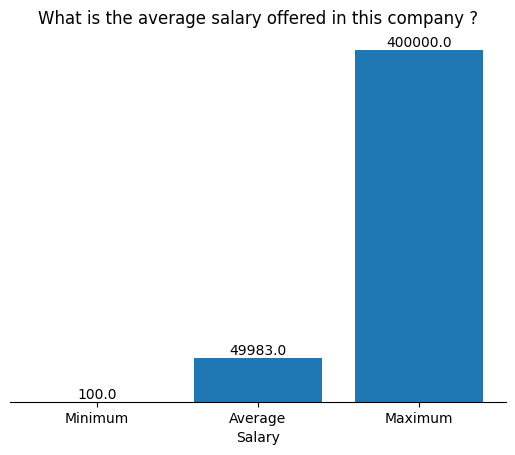

In [44]:
labels = ['Minimum', 'Average','Maximum' ]
counts = [ df['Offered Salary'].min(),Average_sal.round(),df['Offered Salary'].max()]

plt.bar(labels, counts)
plt.xlabel('Salary')
plt.title('What is the average salary offered in this company ?')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(left=False, labelleft=False)
for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
plt.show()

In [ ]:
# Question 3

In [59]:
upper_limit = df['Offered Salary'].max()
lower_limit = df['Offered Salary'].min()
print(upper_limit, lower_limit)

400000.0 100.0


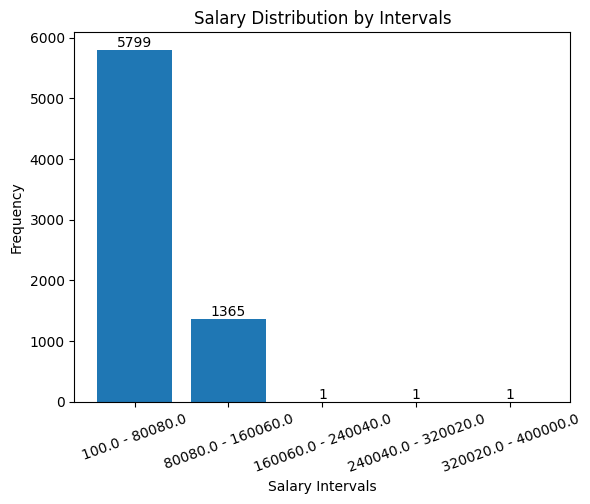

In [84]:
salary_values = [value for value in salary_values if not math.isnan(value)]

range_sal = upper_limit - lower_limit
col = 5
in_wid = range_sal/col

class_intervals = [( lower_limit + i * in_wid, lower_limit + (i + 1) * in_wid)
                   for i in range(col)]

frequency = [0] * col
for value in salary_values:
        for i, interval in enumerate(class_intervals):
            if interval[0] <= value <= interval[1]:
                frequency[i] += 1
                break
x_labels = [f"{interval[0]} - {interval[1]}" for interval in class_intervals]

plt.bar(x_labels, frequency)

plt.xlabel('Salary Intervals')
plt.ylabel('Frequency')
plt.title('Salary Distribution by Intervals')

for i, freq in enumerate(frequency):
        plt.text(i, freq, str(freq), ha='center', va='bottom')
        
plt.xticks(rotation=20)

plt.show()

In [ ]:
# Question 3

In [88]:
departments = list(df['Department'].unique())
departments

['Service Department',
 'Operations Department',
 'Sales Department',
 'Finance Department',
 'Production Department',
 'Purchase Department',
 'Marketing Department',
 'General Management',
 'Human Resource Department']

In [100]:
count = df[df['Department'] == 'Service Department']
count = count['Department'].describe()
print(count['count'])

2055


In [104]:
freq = []

for i in departments : 
    count = df[df['Department'] == i]
    count = count['Department'].describe()
    freq.append(count['count'])
    
print(freq)

[2055, 2771, 747, 288, 380, 333, 325, 172, 97]


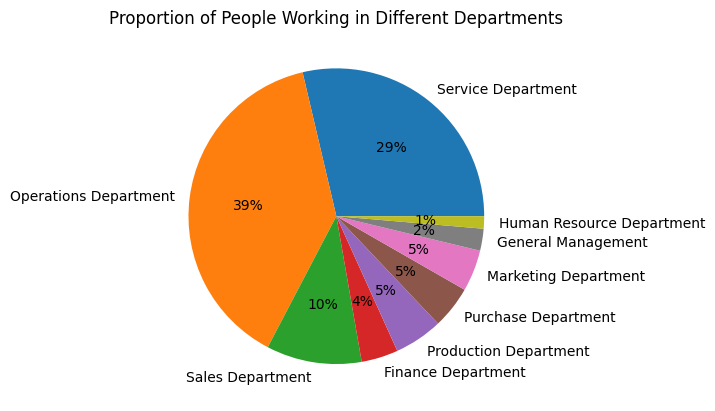

In [111]:
plt.pie(freq, labels=departments, autopct='%1.0f%%')
plt.title('Proportion of People Working in Different Departments')
plt.show()

In [ ]:
# Question 5

In [112]:
post_name = list(df['Post Name'].unique())
post_name

['c8',
 'c5',
 'i4',
 '-',
 'i7',
 'n10',
 'b9',
 'i5',
 'i1',
 'i6',
 'm6',
 'm7',
 'c-10',
 'c9',
 'n9',
 'n6']

In [115]:
freq = []

for i in post_name : 
    count = df[df['Post Name'] == i]
    count = count['Post Name'].describe()
    freq.append(count['count'])
    
print(freq)

[320, 1747, 88, 1, 982, 1, 463, 787, 222, 527, 3, 1, 232, 1792, 1, 1]


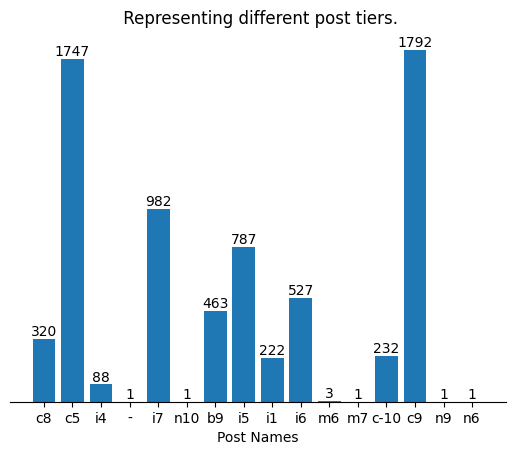

In [116]:
male_count = Males['count']
female_count = Females['count']

labels = post_name
counts = freq

plt.bar(labels, counts)
plt.xlabel('Post Names')
plt.title(' Representing different post tiers.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().tick_params(left=False, labelleft=False)
for i in range(len(labels)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
plt.show()